In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay, f1_score  

2022-12-15 14:20:22.164301: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-15 14:20:22.448391: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-15 14:20:22.448446: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-15 14:20:23.837465: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

### Reading Data

In [2]:
df = pd.read_parquet("creditcard.parquet")

### EDA

In [3]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
492/df.shape[0] * 100

0.1727485630620034

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


array([[<AxesSubplot: title={'center': 'Time'}>,
        <AxesSubplot: title={'center': 'V1'}>,
        <AxesSubplot: title={'center': 'V2'}>,
        <AxesSubplot: title={'center': 'V3'}>,
        <AxesSubplot: title={'center': 'V4'}>,
        <AxesSubplot: title={'center': 'V5'}>],
       [<AxesSubplot: title={'center': 'V6'}>,
        <AxesSubplot: title={'center': 'V7'}>,
        <AxesSubplot: title={'center': 'V8'}>,
        <AxesSubplot: title={'center': 'V9'}>,
        <AxesSubplot: title={'center': 'V10'}>,
        <AxesSubplot: title={'center': 'V11'}>],
       [<AxesSubplot: title={'center': 'V12'}>,
        <AxesSubplot: title={'center': 'V13'}>,
        <AxesSubplot: title={'center': 'V14'}>,
        <AxesSubplot: title={'center': 'V15'}>,
        <AxesSubplot: title={'center': 'V16'}>,
        <AxesSubplot: title={'center': 'V17'}>],
       [<AxesSubplot: title={'center': 'V18'}>,
        <AxesSubplot: title={'center': 'V19'}>,
        <AxesSubplot: title={'center': 'V20'}

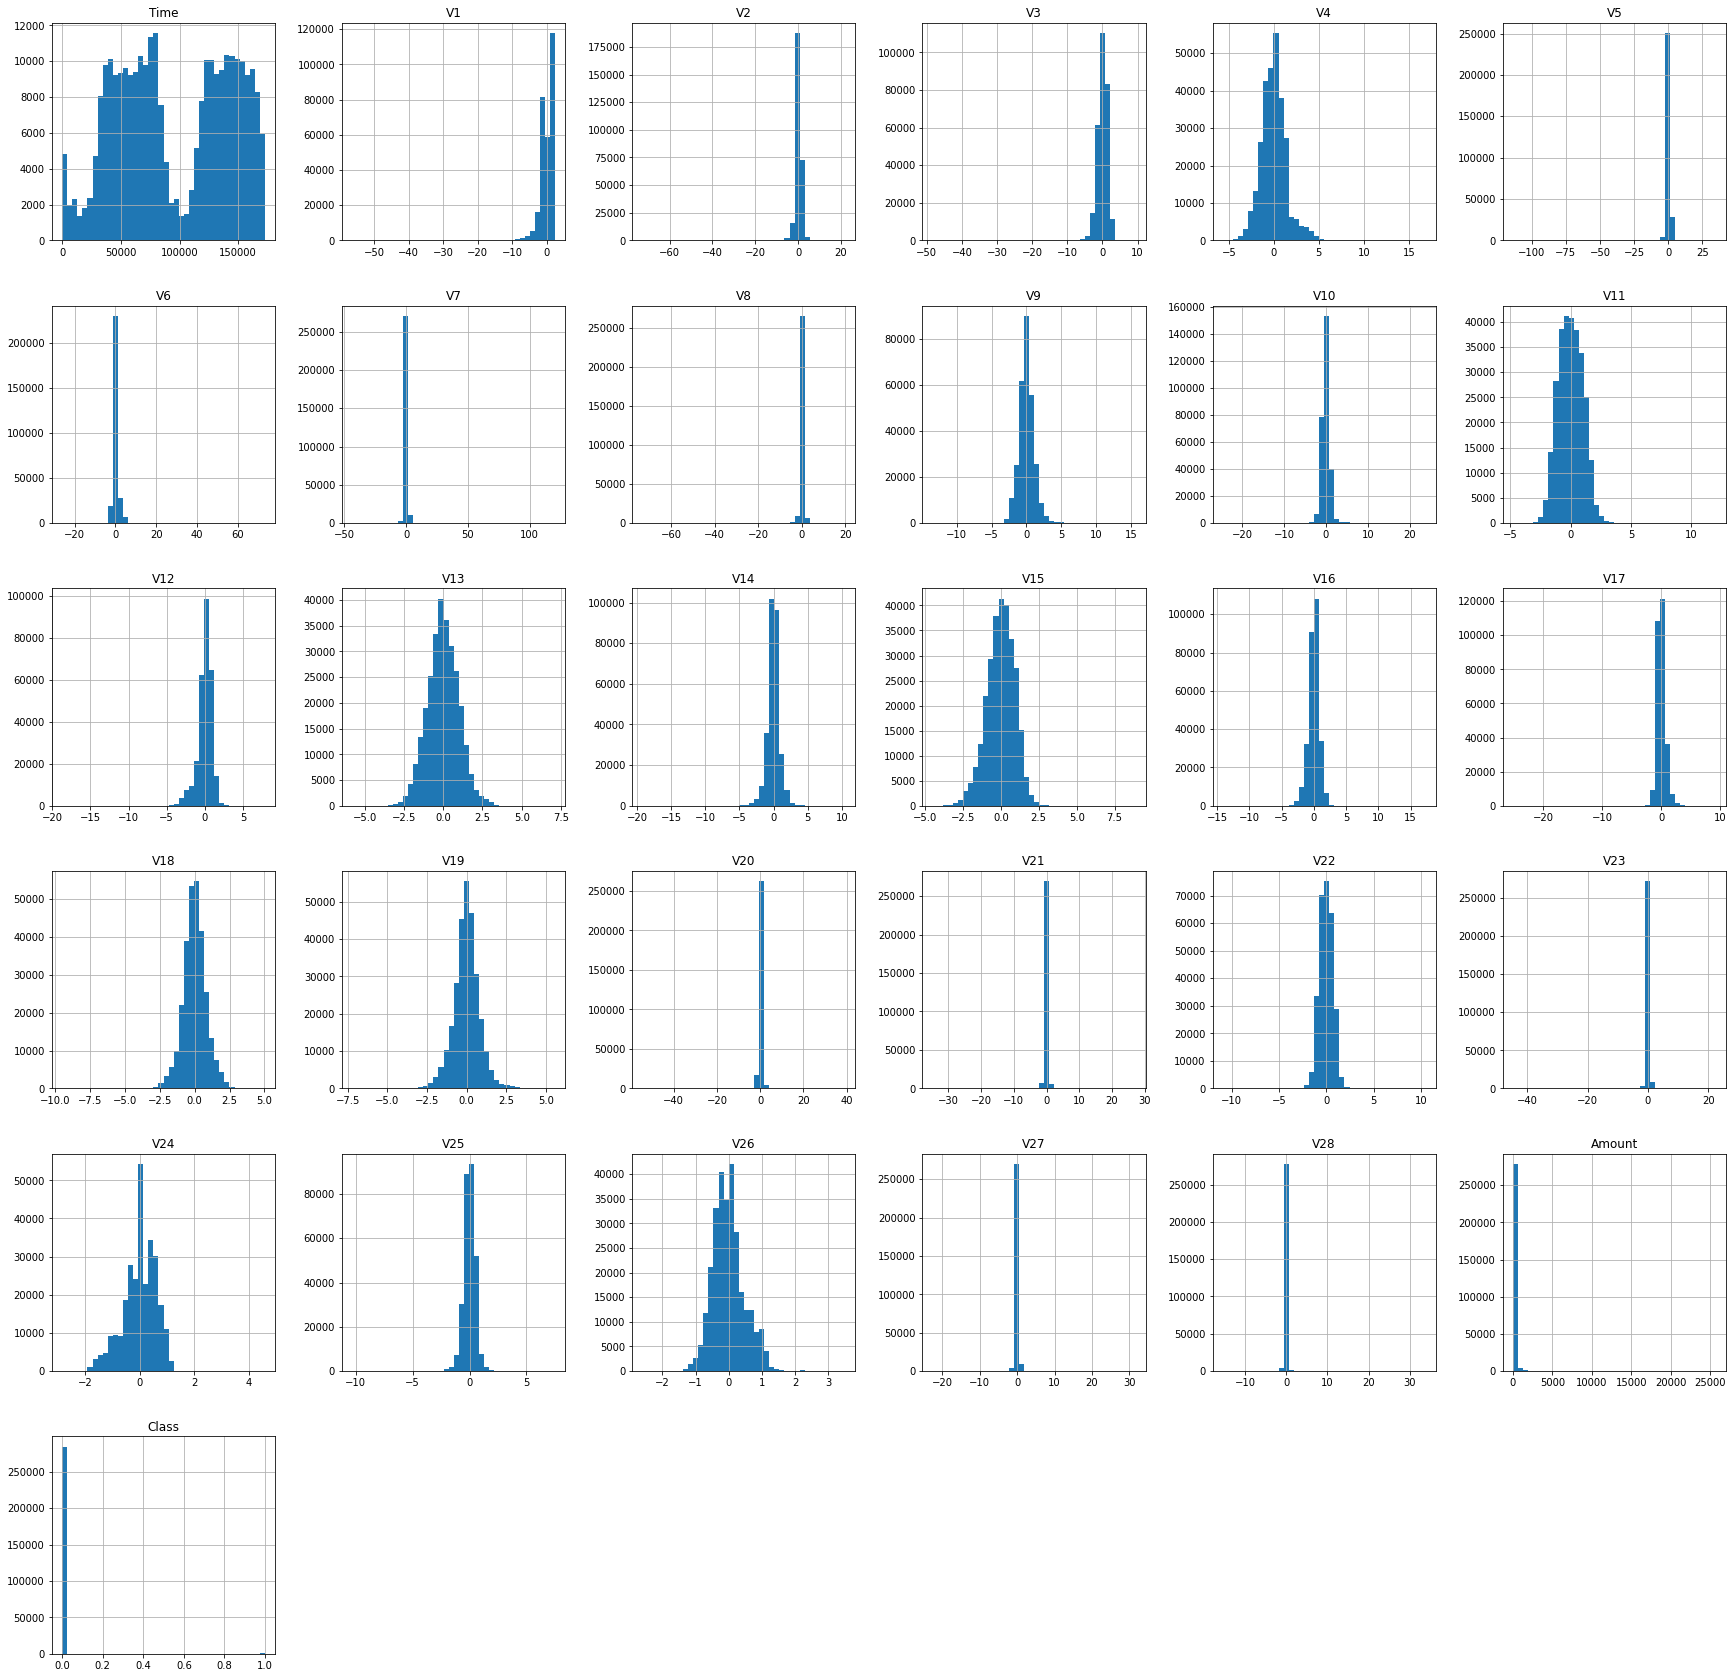

In [7]:
df.hist(bins = 40, figsize = (30,30))

### Spliting

In [8]:
y = df[["Class"]]
X = df.drop(["Class"], axis = 1)

In [9]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 11)

### Normalization

In [10]:
scaler_amount = RobustScaler()
scaler_time = MinMaxScaler()

scaler_amount.fit(X_train["Amount"].to_numpy().reshape(-1,1))
scaler_time.fit(X_train["Time"].to_numpy().reshape(-1,1))

X_train["Amount"] = scaler_amount.transform(X_train["Amount"].to_numpy().reshape(-1,1))
X_train["Time"] = scaler_time.transform(X_train["Time"].to_numpy().reshape(-1,1))

X_test["Amount"] = scaler_amount.transform(X_test["Amount"].to_numpy().reshape(-1,1))
X_test["Time"] = scaler_time.transform(X_test["Time"].to_numpy().reshape(-1,1))

### Evaluate Models

In [11]:
models_details = []

/home/amyrmahdy/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71074
           1       0.83      0.68      0.75       128

    accuracy                           1.00     71202
   macro avg       0.91      0.84      0.87     71202
weighted avg       1.00      1.00      1.00     71202



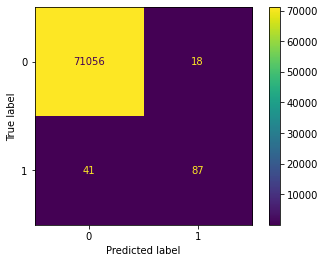

In [12]:
# LogisticRegression
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train,y_train)
lr_prediction = lr.predict(X_test)
models_details.append(["LogisticRegression",f1_score(y_test,lr_prediction)])
print(classification_report(y_test,lr_prediction))
conf_matrix_lr = ConfusionMatrixDisplay(confusion_matrix(y_test,lr_prediction))
conf_matrix_lr.plot()

/tmp/ipykernel_34283/3344232259.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71074
           1       0.97      0.78      0.87       128

    accuracy                           1.00     71202
   macro avg       0.99      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202



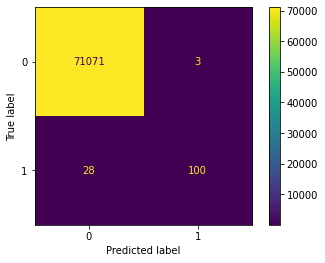

In [13]:
# RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_prediction = rfc.predict(X_test)
models_details.append(["RandomForestClassifier",f1_score(y_test,rfc_prediction)])
print(classification_report(y_test,rfc_prediction))
conf_matrix_rfc = ConfusionMatrixDisplay(confusion_matrix(y_test,rfc_prediction))
conf_matrix_rfc.plot()

/home/amyrmahdy/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71074
           1       0.83      0.73      0.78       128

    accuracy                           1.00     71202
   macro avg       0.92      0.87      0.89     71202
weighted avg       1.00      1.00      1.00     71202



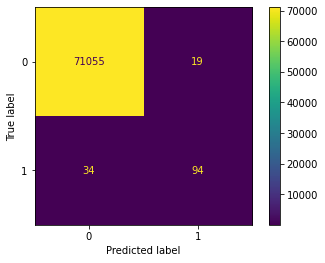

In [14]:
# GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_prediction = gbc.predict(X_test)
models_details.append(["GradientBoostingClassifier",f1_score(y_test,gbc_prediction)])
print(classification_report(y_test,gbc_prediction))
conf_matrix_gbc = ConfusionMatrixDisplay(confusion_matrix(y_test,gbc_prediction))
conf_matrix_gbc.plot()

/home/amyrmahdy/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/amyrmahdy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71074
           1       0.82      0.70      0.75       128

    accuracy                           1.00     71202
   macro avg       0.91      0.85      0.88     71202
weighted avg       1.00      1.00      1.00     71202



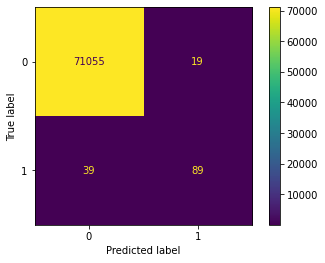

In [15]:
# LinearSVC
lsvc = LinearSVC()
lsvc.fit(X_train,y_train)
lsvc_prediction = lsvc.predict(X_test)
models_details.append(["LinearSVC",f1_score(y_test,lsvc_prediction)])
print(classification_report(y_test,lsvc_prediction))
conf_matrix_lsvc = ConfusionMatrixDisplay(confusion_matrix(y_test,lsvc_prediction))
conf_matrix_lsvc.plot()

In [16]:
# Neural Network Creation
def build_nn():
    nn = tf.keras.Sequential()
    nn.add(tf.keras.layers.InputLayer((X_train.shape[1],)))
    nn.add(tf.keras.layers.Dense(2, 'relu'))
    nn.add(tf.keras.layers.BatchNormalization())
    nn.add(tf.keras.layers.Dense(1,"sigmoid"))
    nn.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
    return nn


2022-12-15 13:22:32.808068: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-15 13:22:32.808101: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-15 13:22:32.808129: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cando): /proc/driver/nvidia/version does not exist
2022-12-15 13:22:32.808396: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
6676/6676 [==============================] - 19s 3ms/step - loss: 0.0543 - accuracy: 0.9925
Epoch 2/10
6676/6676 [==============================] - 17s 3ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 3/10
6676/6676 [==============================] - 17s 3ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 4/10
6676/6676 [==============================] - 17s 2ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 5/10
6676/6676 [==============================] - 17s 3ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 6/10
6676/6676 [==============================] - 17s 3ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 7/10
6676/6676 [==============================] - 17s 3ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 8/10
6676/6676 [==============================] - 17s 3ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 9/10
6676/6676 [==============================] - 17s 2ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 10/10
2226/2226 [==============================] - 4s 2ms/step
    

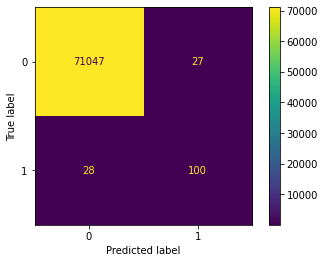

In [17]:
# Neural Network Training
nn = build_nn()
nn.fit(X_train,y_train, epochs = 10)
nn_prediction = nn.predict(X_test)
prediction_nn_final = np.where(nn_prediction > 0.5, 1,0)
models_details.append(["NN",f1_score(y_test,prediction_nn_final)])
print(classification_report(y_test,prediction_nn_final))
conf_matrix_nn = ConfusionMatrixDisplay(confusion_matrix(y_test,prediction_nn_final))
conf_matrix_nn.plot()

### Result

In [21]:
df_models = pd.DataFrame(models_details, columns = ["model", "score"])
df_models = df_models.sort_values(["score"], ascending = False).reset_index(drop = True)
df_models

,model,score
0,RandomForestClassifier,0.865801
1,NN,0.784314
2,GradientBoostingClassifier,0.780083
3,LinearSVC,0.754237
4,LogisticRegression,0.746781


In [19]:

# Author: amyrmahdy
# Date: 14 Dec 2022